# YATClient Twitter Project

## Background Info

* The 2019 European parliamentary elections took place on 24 – 26 May. 
* As a result of the election, there were eight political parties in Germany that held two or more seats in parliament. 
* Our project analyzes the twitter data in the three weeks leading up to the election to look for insights related to the outcome.


|Party|2009|2014|2019|$ \Delta $| % |
|---|---|---|---|---|---|
|CDU/CSU | 42 | 34| 29| <span style="color:red">-5 |<span style="color:red"> -14.71 </span>|
|SPD | 23 | 27| 16| <span style="color:red">-11 | <span style="color:red">-40.74 </span>|
|die Grünen | 14 | 11| 21| <span style="color:green">-10 |<span style="color:green"> 90.91 </span>|
|die Linke | 8 | 7| 5| <span style="color:red">-2 | <span style="color:red">-28.57 </span>|
|AfD | 0 | 7| 11| <span style="color:green"> 4 | <span style="color:green">57.14 </span>|
|FDP | 12 | 3| 5| <span style="color:green"> 2 | <span style="color:green">66.67 </span>|
|die Partei | 0 | 1| 2| <span style="color:green"> 1 | <span style="color:green">100.00 </span>|
|FW | 0 | 1| 2| <span style="color:green"> 1 | <span style="color:green">100.00 </span>|





## Obtain Data and Install

In [2]:
#This will install the package in the actual jupyter notebook Kernel. [with_Jupyter] is obsolete if you start it out of jupyter, but for demo purpose left inside.
import sys
!{sys.executable} --version
!{sys.executable} -m pip install -e "."[with_jupyter] #"." describes the path to the package, in this case its the same folder.

Python 3.6.6
Obtaining file:///home/jovyan/twitter_data_analysis
  Using cached https://files.pythonhosted.org/packages/83/df/0f5dd132200728a86190397e1ea87cd76244e42d39ec5e88efd25b2abd7e/jupyter-1.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/0b/efb5a694b6922bb85c35e4f1db6197daae23c764dd384023fc9517d79e26/qtconsole-4.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cb/ee/6374ae8c21b7d0847f9c3722dcdfac986b8e54fa9ad9ea66e1eb6320d2b8/jupyter_console-6.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/a7/9b1dd14ef45345f186ef69d175bdd2491c40ab1dfa4b2b3e4352df719ed7/prompt_toolkit-2.0.9-py3-none-any.whl


  Found existing installation: prompt-toolkit 1.0.15
    Uninstalling prompt-toolkit-1.0.15:
      Successfully uninstalled prompt-toolkit-1.0.15
  Found existing installation: yatclient 0.1.0
    Can't uninstall 'yatclient'. No files were found to uninstall.
  Running setup.py develop for yatclient
You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Example imports:
import yatclient as yat

from yatclient import TweetAnalyzer,TwitterClient

from yatclient import * #uses __all__ list in __init__.py filename must be declared in this case eg.: twitter_client.TwitterClient

### Enter your twitter Creds here:

In [1]:
#Access
CONSUMER_KEY = "25aKeI8DFf2ew44LSslNwoRBn"
CONSUMER_SECRET = "kkbU4dBNpA9k0Rcu11VMHAt9uv9LjnOohsnaL3xW4itthwOtf1"
ACCESS_TOKEN =  "555424234-wwFaAuK0kYO0V8WTlx71kTwyuQRIRq0QmI8hoRoX"
ACCESS_TOKEN_SECRET = "lLKEDEXnrunCqe9lQ56BkE0XtLdTv9BMKRTmtxGMbtXJl"

### This will download the twitter data of major parties three weeks before European Parliament Election.
- download data for all parties

In [6]:
%%time

import yatclient as yat
import datetime

Parties = ["spdde", "fdp","die_Gruenen","afd","dieLinke","fwlandtag","diepartei","cdu","csu"]
EuropawahlDate = datetime.date(2019, 5, 24)
ThreeWeeksBeforeDate = EuropawahlDate - datetime.timedelta(weeks=3)
today = datetime.date.today()

twitter_client = yat.TwitterClient(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET, Parties)

tweets = twitter_client.get_user_timeline_tweets(start_date = str(ThreeWeeksBeforeDate), end_date = str(EuropawahlDate), retweets = True)

analyzer_load = yat.TweetAnalyzer(tweets)
analyzer_load.write_to_csv("tweets{}.csv".format(today), encoding = "utf-8",index = False)
print("saved data to tweets{}.csv\n".format(today))
df = analyzer_load.get_dataframe()
df.head(2)
print("Timeframe from:\n",df.groupby(by=["author"]).date.min(),"\n\nto date:\n",df.groupby(by=["author"]).date.max(),"\n")

saved data to tweets2019-07-14.csv

Timeframe from:
 author
AfD           2019-05-03 07:00:01
CDU           2019-05-03 05:09:44
CSU           2019-05-03 08:24:59
DiePARTEI     2019-05-03 02:47:54
Die_Gruenen   2019-05-03 07:06:05
dieLinke      2019-05-03 07:47:14
fdp           2019-05-03 07:35:09
fwlandtag     2019-05-08 16:21:48
spdde         2019-05-16 19:06:24
Name: date, dtype: datetime64[ns] 

to date:
 author
AfD           2019-05-23 19:20:55
CDU           2019-05-23 20:48:21
CSU           2019-05-23 17:30:34
DiePARTEI     2019-05-23 22:11:26
Die_Gruenen   2019-05-23 20:20:23
dieLinke      2019-05-23 18:20:08
fdp           2019-05-23 13:24:53
fwlandtag     2019-05-23 09:51:02
spdde         2019-05-23 21:15:03
Name: date, dtype: datetime64[ns] 

CPU times: user 7.29 s, sys: 460 ms, total: 7.75 s
Wall time: 2min 33s


In [73]:
#Wenn Daten bereits vorhanden:
import yatclient as yat
#   
analyzer = yat.TweetAnalyzer()
analyzer.read_from_csv("tweets2019-07-05.csv")
dfr = analyzer.get_dataframe()
dfr = dfr.drop(columns=['Unnamed: 0'])

In [ ]:
dfr= analyzer_load.get_dataframe()
df_SPDEuropa = dfr.loc[dfr["author"] == "SPDEuropa"].copy()
df_fdp = dfr.loc[dfr["author"] == "fdp"].copy()
df_Die_Gruenen = dfr.loc[dfr["author"] == "Die_Gruenen"].copy()
df_AfD = dfr.loc[dfr["author"] == "AfD"].copy()
df_dieLinke = dfr.loc[dfr["author"] == "dieLinke"].copy()
df_fwlandtag = dfr.loc[dfr["author"] == "fwlandtag"].copy()
df_DiePARTEI = dfr.loc[dfr["author"] == "DiePARTEI"].copy()
df_CDU = dfr.loc[dfr["author"] == "CDU"].copy()
df_CSU = dfr.loc[dfr["author"] == "CSU"].copy()

analyzer_SPDEuropa = yat.TweetAnalyzer(df = df_SPDEuropa)
analyzer_fdp = yat.TweetAnalyzer(df = df_fdp)
analyzer_Die_Gruenen = yat.TweetAnalyzer(df = df_Die_Gruenen)
analyzer_AfD = yat.TweetAnalyzer(df = df_AfD)
analyzer_dieLinke = yat.TweetAnalyzer(df = df_dieLinke)
analyzer_fwlandtag = yat.TweetAnalyzer(df = df_fwlandtag)
analyzer_DiePARTEI = yat.TweetAnalyzer(df = df_DiePARTEI)
analyzer_CDU = yat.TweetAnalyzer(df = df_CDU)
analyzer_CSU = yat.TweetAnalyzer(df = df_CSU)

In [74]:
dfr.columns

Index(['tweets', 'author', 'date', 'likes', 'retweets', 'hashtags',
       'linked_accounts', 'urls', 'id', 'tweet_type'],
      dtype='object')

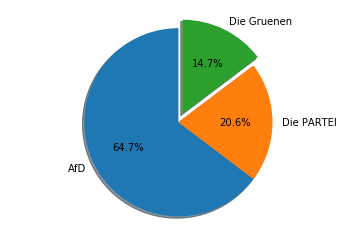

In [8]:
# Pie

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AfD', 'Die PARTEI', 'Die Gruenen'
sizes = [22, 7, 5]
explode = (0, 0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()